# Load packages and data

Look into datra **without** filtering by mean speed first:

In [38]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryTrajectories import SummaryTrajectories
import matplotlib.pyplot as plt
import pandas as pd

# Use the SummaryTrajectories class
fig_size = (12, 6)
summary_file = "RegionBornholm_01062019_30092019_Fish_14400_86400_600_trajectories_summary.csv"
summary_trajectories = SummaryTrajectories(summary_file, save_figures=True, plot_figures=True,
                                           fig_size=fig_size, date="DateTimeStart")
df = summary_trajectories.df
df["Track length (sec)"] = pd.to_datetime(df["DateTimeEnd"]) - pd.to_datetime(df["DateTimeStart"])
df["Track length (sec)"] = df["Track length (sec)"].dt.total_seconds().astype(int)
df["Ship type"] = df["ShipType"] 
df.sample(n=2)

,MMSI,ShipType,TrackLength,MeanSpeed,DateTimeStart,DateTimeEnd,StartLat,EndLat,StartLon,EndLon,DateTimeMean,Month,Weekday Name,Day of Month,Track length (sec),Ship type
DateTime,,,,,,,,,,,,,,,,
2019-06-10 23:00:07,265681420,Fishing,142,0.000489,2019-06-10 23:00:07.000000000,2019-06-11 22:30:07.000000000,55.475249,55.475241,14.286568,14.286557,2019-06-11 10:45:07.000000256,6,Monday,10,84600,Fishing
2019-07-09 05:18:16,211542610,Fishing,47,5.033144,2019-07-09 05:18:16.000000000,2019-07-09 12:58:16.000000000,54.698840,54.687758,13.756262,13.796367,2019-07-09 09:08:16.000000256,7,Tuesday,9,27600,Fishing


In [39]:
# Basic data exploration
summary_trajectories.basic_statistics(resample_frequency=60)

Number of Trajectories: 1133
Number of AIS message updates: 123924
Number of unique MMSIs: 98

Number of unique MMSIs by ShipType
Fishing    98
Name: MMSI, dtype: int64

Mean speed by ShipType
Fishing    2.578018
Name: MeanSpeed, dtype: float64

Number of trajectories by ShipType
Fishing    1133
Name: ShipType, dtype: int64

Summary statistics for track length in minutes: 
count    1133.000000
mean      109.376876
std        36.535332
min        25.000000
25%        79.000000
50%       124.000000
75%       141.000000
max       144.000000
Name: TrackLength, dtype: float64



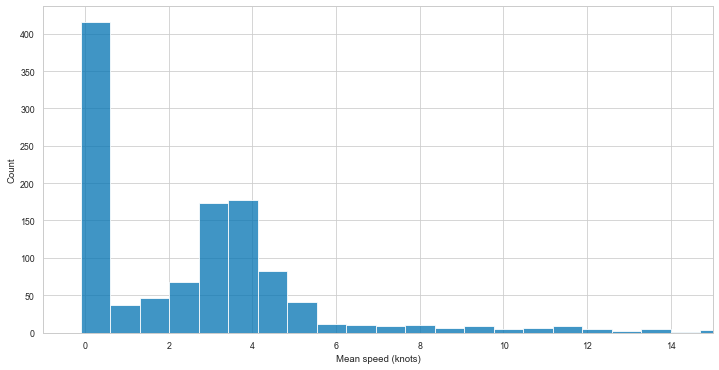

In [40]:
# Plot the mean speed histogram for each ship type
df_hist = df.reset_index()
summary_trajectories.hist_bar_plot(df_hist, "Histogram", "MeanSpeed", xlabel="Mean speed (knots)", xlim=[-1, 15])

Look into data **after** applying a filter by mean speed (Min Speed = 0.2 Knots):

In [19]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryTrajectories import SummaryTrajectories
import matplotlib.pyplot as plt
import pandas as pd

# Use the SummaryTrajectories class
fig_size = (12, 6)
summary_file = "RegionBornholm_01062019_30092019_Fish_14400_86400_600_02_trajectories_summary.csv"
summary_trajectories = SummaryTrajectories(summary_file, save_figures=True, plot_figures=True,
                                           fig_size=fig_size, date="DateTimeStart")
df = summary_trajectories.df
df["Track length (sec)"] = pd.to_datetime(df["DateTimeEnd"]) - pd.to_datetime(df["DateTimeStart"])
df["Track length (sec)"] = df["Track length (sec)"].dt.total_seconds().astype(int)
df["Ship type"] = df["ShipType"] 
df.sample(n=2)

,MMSI,ShipType,TrackLength,MeanSpeed,MeanCourse,DateTimeStart,DateTimeEnd,MeanLat,StartLat,EndLat,MeanLon,StartLon,EndLon,DateTimeMean,Month,Weekday Name,Day of Month,Track length (sec),Ship type
DateTime,,,,,,,,,,,,,,,,,,,
2019-08-29 01:35:35,266315000,Fishing,77,4.583788,188.546492,2019-08-29 01:35:35.000000000,2019-08-29 14:15:35.000000000,55.834066,55.984597,55.994297,15.129094,14.759201,14.748528,2019-08-29 07:55:35.000000256,8,Thursday,29,45600,Fishing
2019-08-27 21:46:37,265750000,Fishing,105,7.409124,204.405786,2019-08-27 21:46:37.000000000,2019-08-28 15:06:37.000000000,55.142281,55.558036,55.558370,14.971004,14.361442,14.359884,2019-08-28 06:26:36.999999488,8,Tuesday,27,62400,Fishing


In [21]:
# Basic data exploration
summary_trajectories.basic_statistics(resample_frequency=60)

Number of Trajectories: 723
Number of AIS message updates: 59045
Number of unique MMSIs: 96

Number of unique MMSIs by ShipType
Fishing    96
Name: MMSI, dtype: int64

Mean speed by ShipType
Fishing    4.584099
Name: MeanSpeed, dtype: float64

Number of trajectories by ShipType
Fishing    723
Name: ShipType, dtype: int64

Summary statistics for track length in minutes: 
count    723.000000
mean      81.666667
std       34.284630
min       25.000000
25%       52.000000
50%       78.000000
75%      110.000000
max      144.000000
Name: TrackLength, dtype: float64



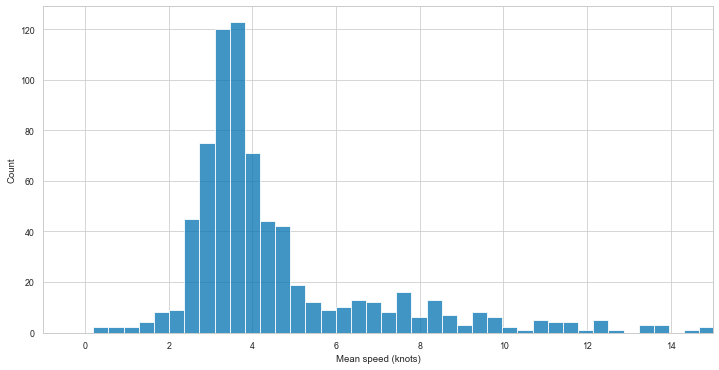

In [23]:
# Plot the mean speed histogram for each ship type
df_hist = df.reset_index()
summary_trajectories.hist_bar_plot(df_hist, "Histogram", "MeanSpeed", xlabel="Mean speed (knots)", xlim=[-1, 15])

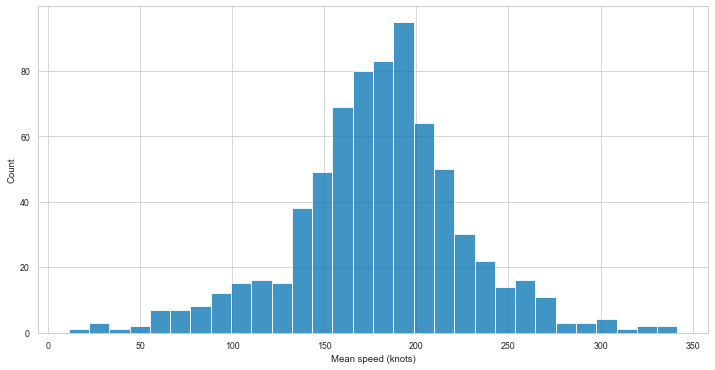

In [26]:
# Plot the mean speed histogram for each ship type
df_hist = df.reset_index()
summary_trajectories.hist_bar_plot(df_hist, "Histogram", "MeanCourse", xlabel="Mean speed (knots)")

Look into data **after** applying a filter by mean speed (Min Speed = 0.1 Knots):

In [30]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryTrajectories import SummaryTrajectories
import matplotlib.pyplot as plt
import pandas as pd

# Use the SummaryTrajectories class
fig_size = (12, 6)
summary_file = "RegionBornholm_01062019_30092019_Fish_14400_86400_600_01_trajectories_summary.csv"
summary_trajectories = SummaryTrajectories(summary_file, save_figures=True, plot_figures=True,
                                           fig_size=fig_size, date="DateTimeStart")
df = summary_trajectories.df
df["Track length (sec)"] = pd.to_datetime(df["DateTimeEnd"]) - pd.to_datetime(df["DateTimeStart"])
df["Track length (sec)"] = df["Track length (sec)"].dt.total_seconds().astype(int)
df["Ship type"] = df["ShipType"] 
df.sample(n=2)

,MMSI,ShipType,TrackLength,MeanSpeed,MeanCourse,DateTimeStart,DateTimeEnd,MeanLat,StartLat,EndLat,MeanLon,StartLon,EndLon,DateTimeMean,Month,Weekday Name,Day of Month,Track length (sec),Ship type
DateTime,,,,,,,,,,,,,,,,,,,
2019-08-24 06:55:39,219019555,Fishing,25,12.480688,298.607701,2019-08-24 06:55:39.000000000,2019-08-24 10:55:39.000000000,54.875314,54.515108,55.199627,13.408336,13.700727,13.006635,2019-08-24 08:55:38.999999744,8,Saturday,24,14400,Fishing
2019-09-18 22:57:48,273352230,Fishing,54,12.429722,98.332645,2019-09-18 22:57:48.000000000,2019-09-19 07:47:48.000000000,54.928084,55.203043,54.932850,14.520780,13.029428,15.989950,2019-09-19 03:22:48.000000256,9,Wednesday,18,31800,Fishing


In [31]:
# Basic data exploration
summary_trajectories.basic_statistics(resample_frequency=60)

Number of Trajectories: 891
Number of AIS message updates: 75365
Number of unique MMSIs: 96

Number of unique MMSIs by ShipType
Fishing    96
Name: MMSI, dtype: int64

Mean speed by ShipType
Fishing    3.59715
Name: MeanSpeed, dtype: float64

Number of trajectories by ShipType
Fishing    891
Name: ShipType, dtype: int64

Summary statistics for track length in minutes: 
count    891.000000
mean      84.584736
std       34.545823
min       25.000000
25%       55.000000
50%       83.000000
75%      115.500000
max      144.000000
Name: TrackLength, dtype: float64



**STILL A LARGE SPIKE IN BEGINNING**

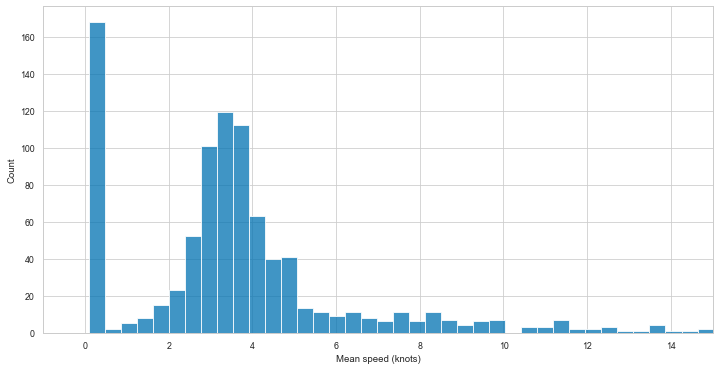

In [32]:
# Plot the mean speed histogram for each ship type
df_hist = df.reset_index()
summary_trajectories.hist_bar_plot(df_hist, "Histogram", "MeanSpeed", xlabel="Mean speed (knots)", xlim=[-1, 15])